# Importing Libraries

In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

# Loading Image

In [3]:
img_path = './images/Bird2.jpg'
img_path

'./images/Bird2.jpg'

In [15]:
bgr_img = cv2.imread(img_path, -1)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.imread(img_path, 0)
rgb_img.shape
gray_img.shape

(1200, 1920)

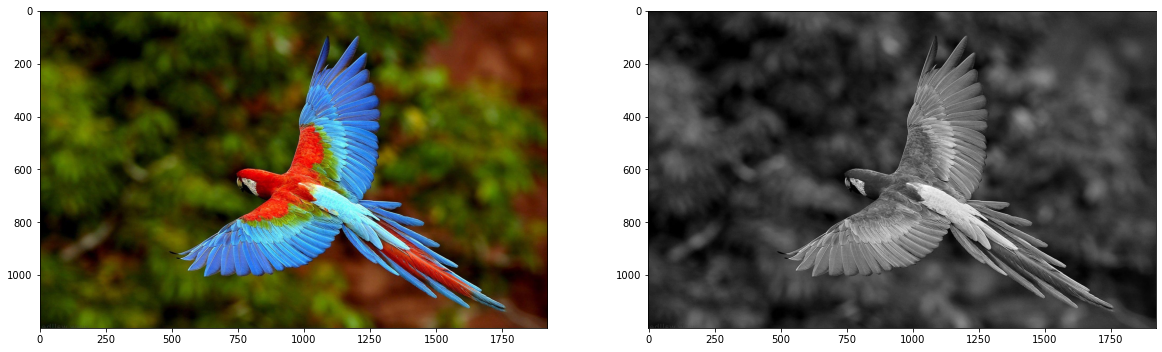

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(rgb_img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap='gray')

plt.show()

# Declaring Functions

In [23]:
def Padding (img):
    w,h = img.shape
    new_img = np.zeros(shape=(w+2,h+2))
    new_w,new_h = new_img.shape
    new_img[1:new_w-1, 1:new_h-1] = img
    
    return new_img